# Mapping Accidents in NYC - Data Bootcamp Project 2018
## NYC Open Data
### Ian Glennon | May 2018
![alt text](http://www.learnersonline.com/wp-content/uploads/2014/01/trafficjam6.jpg)



## Contents

1. Overview
2. Data Source
    * 2.1. Data and Module Import
    * 2.2. Data Information
    * 2.3. Data Cleaning
3. Visualizing The Data
    * 3.1. Where Accidents Occur
    * 3.2. When Accidents Occur
    * 3.3. Why Accidents Occur
4. Conclusion

## 1. Overview

What impacts accidents? In particular, what are the major driver-related reasons for accidents, when do they occur, and where do they occur?

Better understanding the factors that lead to accidents can help officials in two main ways. First, this can aid in the allocation of resources. This relates to both city planning - i.e. where to locate hospitals and police stations - as well as city operations - i.e. where and when to place ambulance and police teams on standby. Second, this can help officials and individuals target behaviour. Government can better inform citizens what they should be aware of as well as launch programs to incentivize targeted good behaviours and restrict targeted bad behaviours. 

This project looks to leverage NYPD Motor Vehicle Collision data located on [NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data). It parses collision data for the period of March 21, 2017 to March 21,2018 from the five Boroughs of NYC.



 ## 2. Data Source
 ### 2.1 Data and Module Import
 
 NYC Open Data is a project aimed at making NYC government data freely available. It is founded thanks to a partnership between The Mayor’s Office of Data Analytics (MODA), the Department of Information Technology and Telecommunications (DoITT), and Socrata. While vast amount of data are available on this site, I chose to look at NYPD Motor Vehicle Collision data.
 
 The data was obtained through a json query via https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data

In [1]:
#Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt     # graphics package
import matplotlib as mpl            # graphics package
import numpy as np
import datetime 
import matplotlib.patches as mpatches

#Fetching Data from NYC Open Data
url = 'https://data.cityofnewyork.us/resource/qiz3-axqb.json?$limit=500000'
accidents = pd.read_json(url) 

accidents.dtypes

borough                                  object
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4            object
contributing_factor_vehicle_5            object
cross_street_name                        object
date                             datetime64[ns]
latitude                                float64
location                                 object
longitude                               float64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_persons_injured                 int64
number_of_persons_killed                  int64
off_street_name                          object
on_street_name                          

In [2]:
#Getting borough data for per capita comparisons
url2 = 'https://data.cityofnewyork.us/resource/h2bk-zmw6.json'
boroughpop = pd.read_json(url2)
boroughpop = boroughpop.sort_values(by='borough', ascending=False) #important for later per capita calculations
boroughpop.dtypes

borough           object
sum_population     int64
dtype: object

### 2.2 Data Information
We can see here that there is a lot of information in the accidents file. The important data for the analysis are borough, date and time information, number of people killed and injured, and accident reason. We are also only interested in accidents across one full year, so as not to have overlap in analysis.

In [3]:
accidents.dtypes

borough                                  object
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4            object
contributing_factor_vehicle_5            object
cross_street_name                        object
date                             datetime64[ns]
latitude                                float64
location                                 object
longitude                               float64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_persons_injured                 int64
number_of_persons_killed                  int64
off_street_name                          object
on_street_name                          

In [4]:
boroughpop.dtypes

borough           object
sum_population     int64
dtype: object

It's important to note the relative size of each borough. Staten Island is the smallest borough by far, with Queens and Brooklyn holding the lion's share of New York's population. 

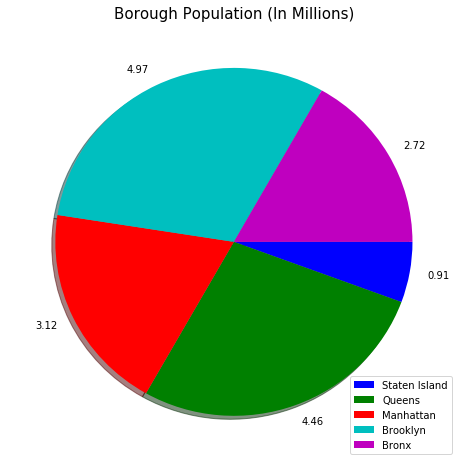

In [5]:
values = round(boroughpop["sum_population"]/1000000,2)
colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = boroughpop['borough']

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Borough Population (In Millions)',fontsize=15)
plt.legend(labels,loc=4)
plt.show()



### 2.3 Data Cleaning
Below I drop the uneeded columns. I also rename the columns we will be using to make them easy to work with. I also filter out any data that doesn't fall within March 21, 2017 and March 21, 2018.

In [6]:
#Understanding data columns. Dropping unneeded columns and renaming
accidents.dtypes
accidents.drop(accidents.columns[[3,4,5,6,8,9,10,17,18,19,20,22,25,26,27,28]], axis=1, inplace=True)

# rename columns
accidents.columns = ['Borough', 'Contributing_Factor_1', 'Contributing_Factor_2','Date','Cyclists Injured','Cyclists Killed','Motorists Injured','Motorists Killed','Pedestrians Injured','Pedestrians Killed','Time','Vehicle Type 1','Vehicle Type 2']

#Get one year's worth of data
accidents[(accidents['Date']>datetime.date(2017,3,21)) & (accidents['Date']<datetime.date(2018,3,21))]  

,Borough,Contributing_Factor_1,Contributing_Factor_2,Date,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Pedestrians Injured,Pedestrians Killed,Time,Vehicle Type 1,Vehicle Type 2
385,MANHATTAN,Passing or Lane Usage Improper,Unspecified,2017-03-22,0,0,0,0,0,0,16:52,TAXI,NaN
576,NaN,Unspecified,Unspecified,2017-03-30,0,0,0,0,0,0,8:00,PASSENGER VEHICLE,NaN
880,NaN,Unspecified,Unspecified,2017-03-31,0,0,0,0,0,0,10:24,NaN,NaN
1155,NaN,Unsafe Lane Changing,Unspecified,2017-06-24,0,0,0,0,0,0,19:00,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON
1507,NaN,Obstruction/Debris,NaN,2017-03-22,0,0,0,0,0,0,8:45,PASSENGER VEHICLE,NaN
1686,NaN,Turning Improperly,Unspecified,2017-03-22,0,0,0,0,0,0,5:25,PASSENGER VEHICLE,NaN
1687,NaN,Unspecified,Unspecified,2017-03-22,0,0,0,0,0,0,6:55,PASSENGER VEHICLE,NaN
1689,QUEENS,Backing Unsafely,Unspecified,2017-03-22,0,0,0,0,0,0,6:30,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
1690,BROOKLYN,Driver Inattention/Distraction,Unspecified,2017-03-22,0,0,0,0,0,0,6:30,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
1691,NaN,Reaction to Other Uninvolved Vehicle,Unspecified,2017-03-22,0,0,0,0,0,0,7:10,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON


Here I extract valuable Month and Hour information from the Date and Time columns, respectively. I also opt to add a column for "Total Killed" and "Total Injured". There seems to already be a column for this, but I prefer to do this sumation within Python.

In [7]:
#obtaining total injured, total killed, and month + hour of accident

accidents['Total Injured'] = accidents['Cyclists Injured'] + accidents['Motorists Injured'] + accidents['Pedestrians Injured']
accidents['Total Killed'] = accidents['Cyclists Killed'] + accidents['Motorists Killed'] + accidents['Pedestrians Killed']
accidents['MonthNumber'] = pd.DatetimeIndex(accidents['Date']).month
accidents["Time"] = pd.to_datetime(accidents["Time"])
accidents["Hour"] = accidents["Time"].dt.hour

#Converting Month to text
accidents['Month'] = accidents['MonthNumber'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


print(accidents)

              Borough           Contributing_Factor_1  \
0            BROOKLYN                     Unspecified   
1                 NaN               Oversized Vehicle   
2                 NaN                     Fell Asleep   
3                 NaN                    Unsafe Speed   
4            BROOKLYN                     Unspecified   
5                 NaN                 Other Vehicular   
6              QUEENS  Driver Inattention/Distraction   
7                 NaN                     Unspecified   
8                 NaN  Driver Inattention/Distraction   
9           MANHATTAN              Turning Improperly   
10             QUEENS             Alcohol Involvement   
11                NaN  Driver Inattention/Distraction   
12              BRONX  Driver Inattention/Distraction   
13                NaN  Passing or Lane Usage Improper   
14                NaN           Following Too Closely   
15             QUEENS                           Glare   
16                NaN          

 ## 3. Visualizing the Data
 
 ### 3.1 Where Accidents Occur
 
 Accidents broken down by the five boroughs of New York City.
 
 ### 3.1.1 By Borough and Traveler

Injuries and deaths by borough and by type of traveler.

In [8]:
accidentsgrouped = accidents.groupby(['Borough']).sum()

#sorting accidents grouped by borough so that it matches up with our borough population dataframe. This will be used later
accidentsgrouped['boroughsort']=accidentsgrouped.index
accidentsgrouped = accidentsgrouped.sort_values(by='boroughsort', ascending=False)

accidentsgrouped['Pedestrians Injured Per Cap'] = np.divide(accidentsgrouped['Pedestrians Injured'],boroughpop['sum_population'])
accidentsgrouped['Motorists Injured Per Cap'] = np.divide(accidentsgrouped['Motorists Injured'],boroughpop['sum_population'])
accidentsgrouped['Cyclists Injured Per Cap'] = np.divide(accidentsgrouped['Cyclists Injured'],boroughpop['sum_population'])
accidentsgrouped['Pedestrians Killed Per Cap'] = np.divide(accidentsgrouped['Pedestrians Killed'],boroughpop['sum_population'])
accidentsgrouped['Motorists Killed Per Cap'] = np.divide(accidentsgrouped['Motorists Killed'],boroughpop['sum_population'])
accidentsgrouped['Cyclists Killed Per Cap'] = np.divide(accidentsgrouped['Cyclists Killed'],boroughpop['sum_population'])

#Setting of dataframes around types of injuries and deaths
pedestinjuriesbyborough = accidentsgrouped.sort_values(by='Pedestrians Injured', ascending=False)
pedestdeathsbyborough = accidentsgrouped.sort_values(by='Pedestrians Killed', ascending=False)
motorinjuriesbyborough = accidentsgrouped.sort_values(by='Motorists Injured', ascending=False)
motordeathsbyborough = accidentsgrouped.sort_values(by='Motorists Killed', ascending=False)
cyclistinjuriesbyborough = accidentsgrouped.sort_values(by='Cyclists Injured', ascending=False)
cyclistdeathsbyborough = accidentsgrouped.sort_values(by='Cyclists Killed', ascending=False)

print(accidentsgrouped)

               Cyclists Injured  Cyclists Killed  Motorists Injured  \
Borough                                                               
STATEN ISLAND                71                0               1867   
QUEENS                     1119                6              12055   
MANHATTAN                  1655                9               4454   
BROOKLYN                   2120               12              13008   
BRONX                       560                2               6728   

               Motorists Killed  Pedestrians Injured  Pedestrians Killed  \
Borough                                                                    
STATEN ISLAND                 8                  368                   7   
QUEENS                       19                 3208                  47   
MANHATTAN                     4                 2913                  35   
BROOKLYN                     20                 4396                  36   
BRONX                         8               

Here we see a comparison between Pedestrian, Motorists, and Cyclist injuries and deaths across Buroughs. Interestingly, the ranking between boroughs changes across types of commuters and across injuries and deaths.

#### Observations
1. Why are almost as many motorists killed on Staten Island as in the Bronx (3rd), even though Staten Island is consistently ranked lowest in all other areas?
2. Why does Queens take the lead for pedestrians killed, even though it is ranked 2nd and 3rd in all other types of accidents?
3. Why does Manhattan seem to have the highest variability amongst buroughs, being last in Motorists injured/killed, 2nd in cyclists injured/killed, and middle of the pack for pedestrian injuries?
4. Why does Staten Island have such low rates of Cyclist injuries and deaths?

#### Potential Additions

Of course, we would have to understand these numbers better in the context of per capita rates. This could be done by merging with a population dataset and dividing these rates by number of inhabitants. However, this would still not account for the fact that some areas have very high commuter rates.

Perhaps better would be to look at geographic size, or even total traffic flow. Geographic size may paint a better picture, but this still lacks information on density. In regards to total traffic flow, well, let me know if that dataset exists!

#### Takeaways

1. Do many vehicles pass through Staten Island, lending to its high motorist deaths? Or, does Staten Island have inadequate speed limits, traffic lights, stop signs, etc.? Higher speed tolerances may explain why Staten Island jumps more in deaths than in injuries. Perhaps Staten Island's motor policy needs review.
2. Does Queens have a higher proportion of people who walk? Or, are sidewalks inadequate, crosswalks ignored, and residents lacking general safety habits like looking both ways? In this area, perhaps Queen's outreach and development programs need review.
3. Does Manhattan see such high variability because it is the most diverse burough of them all? Or, does it clearly have a problem providing adequate laneways for cyclists? I know I personally see cyclists navigating erractically, crossing intersections when lights are red and even failing to look both ways when doing so. The data indicates a clear problem, supported by anecdotal evidence. Perhaps Manhattan needs to look in providing better bicycly lanes as well as fining cyclists for ignoring lights in the same way they would motorists.
4. Does Staten Island have few cyclists? Or does it adequately provide for them and enforce cyclist law? Perhaps Manhattan and Brooklyn could learn from them.

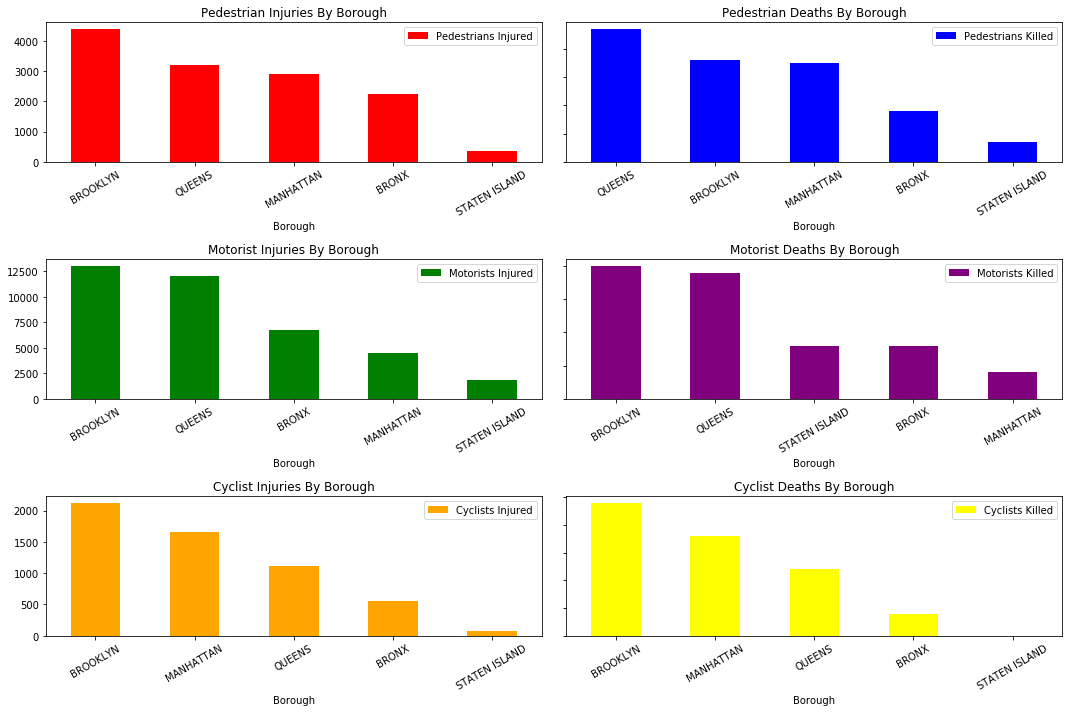

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2)
pedestinjuriesbyborough[['Pedestrians Injured']].plot(kind='bar', ax=ax[0,0], color=['red'], width=0.5, title ="Pedestrian Injuries By Borough", figsize=(15, 10), legend=True,fontsize=10, rot = 30)
pedestdeathsbyborough[['Pedestrians Killed']].plot(kind='bar', ax=ax[0,1], color=['blue'],width=0.5, title ="Pedestrian Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[0,0],rot = 30 )
motorinjuriesbyborough[['Motorists Injured']].plot(kind='bar', ax=ax[1,0], color=['green'], width=0.5, title ="Motorist Injuries By Borough", figsize=(15, 10), legend=True,fontsize=10, rot = 30)
motordeathsbyborough[['Motorists Killed']].plot(kind='bar', ax=ax[1,1], color=['purple'],width=0.5, title ="Motorist Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[1,0],rot = 30 )
cyclistinjuriesbyborough[['Cyclists Injured']].plot(kind='bar', ax=ax[2,0], color=['orange'],width=0.5, title ="Cyclist Injuries By Borough", figsize=(15, 10), legend=True, fontsize=10,rot = 30 )
cyclistdeathsbyborough[['Cyclists Killed']].plot(kind='bar', ax=ax[2,1], color=['yellow'],width=0.5, title ="Cyclist Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[2,0],rot = 30)

fig.tight_layout()                                         
fig.subplots_adjust(wspace=0.05, hspace=0.7)
plt.show()

Taking into account borough populations, some observations change or become clearer.

1. Staten Island is far ahead of the other buroughs in terms of motorists killed per capita - something is clearly wrong.
2. Pedestrian deaths for Queens seem even more shocking now given its per capita ranking against other buroughs.
3. Manhattan's variability now appears largely explained. It has by far the lowest motorist deaths and injuries per capita of any borough and yet it has the highest per capita rate of injuries and deaths of cyclists and pedestrians per capita than any other burough. This is likely explained by the foot traffic density and slow traffic speed in the city. It may also indicate inadequate protection for non-motorists
4. The low level of cyclist injuries and deaths in Staten Island is even more impressive when looked at per capita.
5. Finally, a general observation is that far more drivers are killed and injured by accidents than pedestrians and cyclists (see axes). This is perhaps not surprising, though it is certainly reassuring that those who are "at fault" are those who are most affected.

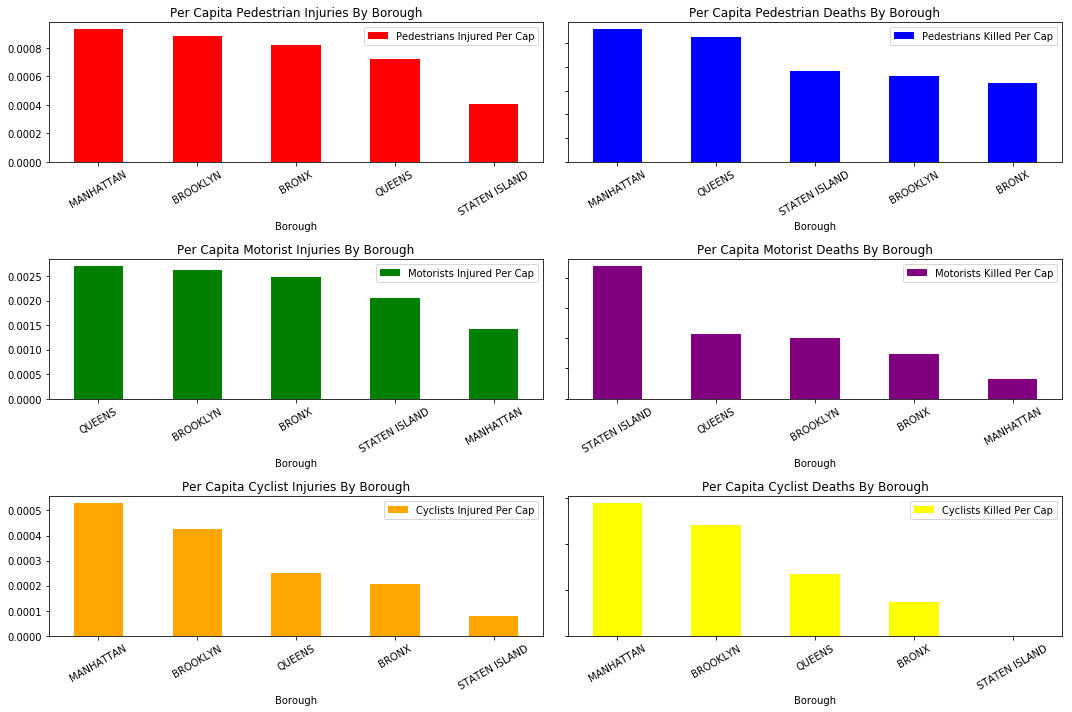

In [10]:
#setting up sorting for graphs
pedestinjuriesbyborough = accidentsgrouped.sort_values(by='Pedestrians Injured Per Cap', ascending=False)
pedestdeathsbyborough = accidentsgrouped.sort_values(by='Pedestrians Killed Per Cap', ascending=False)
motorinjuriesbyborough = accidentsgrouped.sort_values(by='Motorists Injured Per Cap', ascending=False)
motordeathsbyborough = accidentsgrouped.sort_values(by='Motorists Killed Per Cap', ascending=False)
cyclistinjuriesbyborough = accidentsgrouped.sort_values(by='Cyclists Injured Per Cap', ascending=False)
cyclistdeathsbyborough = accidentsgrouped.sort_values(by='Cyclists Killed Per Cap', ascending=False)

fig, ax = plt.subplots(nrows=3, ncols=2)
pedestinjuriesbyborough[['Pedestrians Injured Per Cap']].plot(kind='bar', ax=ax[0,0], color=['red'], width=0.5, title ="Per Capita Pedestrian Injuries By Borough", figsize=(15, 10), legend=True,fontsize=10, rot = 30,sort_columns=True)
pedestdeathsbyborough[['Pedestrians Killed Per Cap']].plot(kind='bar', ax=ax[0,1], color=['blue'],width=0.5, title ="Per Capita Pedestrian Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[0,0],rot = 30,sort_columns=True )
motorinjuriesbyborough[['Motorists Injured Per Cap']].plot(kind='bar', ax=ax[1,0], color=['green'], width=0.5, title ="Per Capita Motorist Injuries By Borough", figsize=(15, 10), legend=True,fontsize=10, rot = 30,sort_columns=True)
motordeathsbyborough[['Motorists Killed Per Cap']].plot(kind='bar', ax=ax[1,1], color=['purple'],width=0.5, title ="Per Capita Motorist Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[1,0],rot = 30,sort_columns=True )
cyclistinjuriesbyborough[['Cyclists Injured Per Cap']].plot(kind='bar', ax=ax[2,0], color=['orange'],width=0.5, title ="Per Capita Cyclist Injuries By Borough", figsize=(15, 10), legend=True, fontsize=10,rot = 30,sort_columns=True )
cyclistdeathsbyborough[['Cyclists Killed Per Cap']].plot(kind='bar', ax=ax[2,1], color=['yellow'],width=0.5, title ="Per Capita Cyclist Deaths By Borough", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[2,0],rot = 30,sort_columns=True)

fig.tight_layout()                                         
fig.subplots_adjust(wspace=0.05, hspace=0.7)
plt.show()

 ### 3.1.2 Borough and Traveler Summarized
 
 #### Observations and Takeaways
Looking at the numbers from another angle, we see that Brooklyn has the most injuries, but Queens has the most deaths. Furthermore, we see that this difference is largely due to pedestrian deaths, and this is despite the fact that Queens has fewer pedestrian injuries than Brooklyn. Does Queens have a poor hospital system that is either not getting injured pedestrians to treatment quickly enough or is losing them in the hospital themselves. Ultimately, are there more deaths that could have been just injuries?
 
We also see that while Manhattan and The Bronx have about the same amount of injuries, Manhattan has almost twice as many deaths as The Bronx. Again, this difference seems to be due to pedestrian deaths. This might inform us that Amblance ride windows are too long or hospital ER treatment not adequate for pedestrian type injuries.

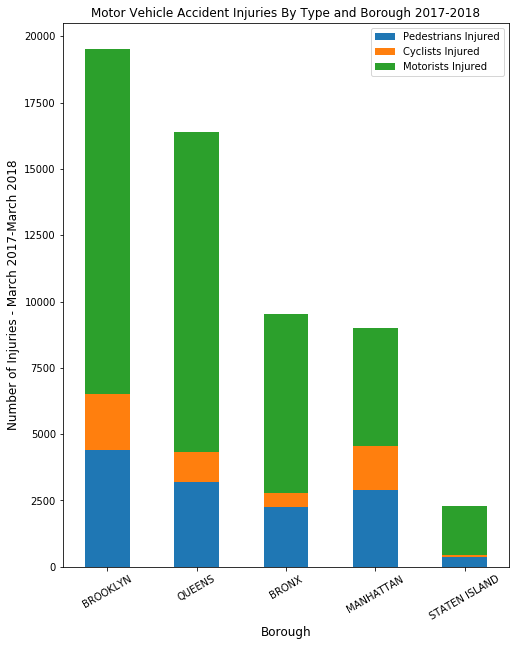

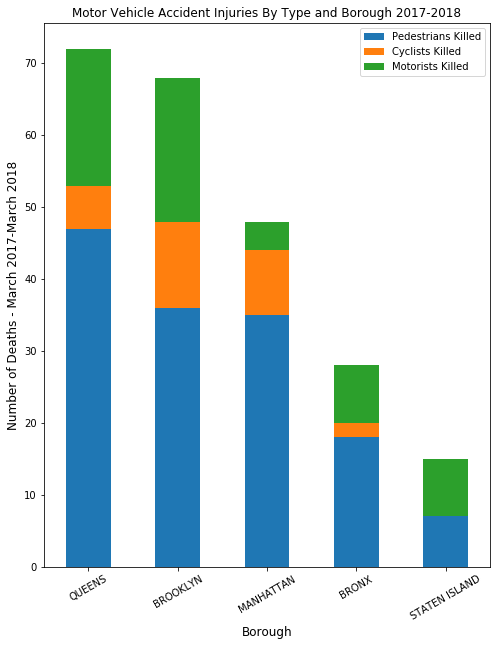

In [18]:
injuriesbyborough = accidentsgrouped.sort_values(by='Total Injured', ascending=False)
deathsbyborough = accidentsgrouped.sort_values(by='Total Killed', ascending=False)

ax = injuriesbyborough[['Pedestrians Injured','Cyclists Injured', 'Motorists Injured']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Injuries - March 2017-March 2018", fontsize=12)

ax = deathsbyborough[['Pedestrians Killed','Cyclists Killed', 'Motorists Killed']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Deaths - March 2017-March 2018", fontsize=12)

plt.show()

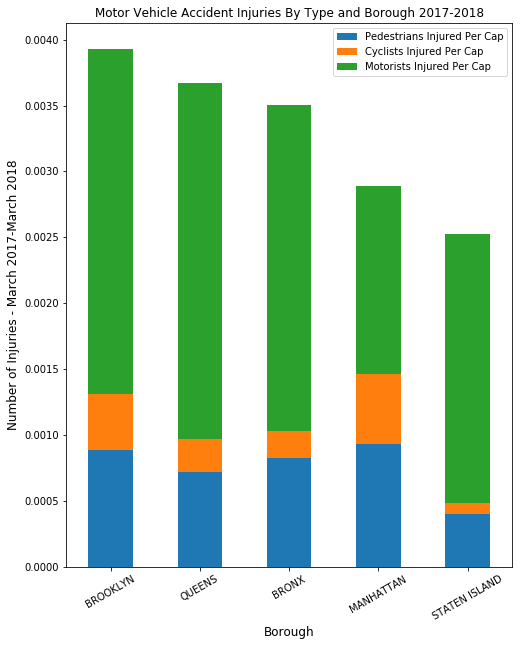

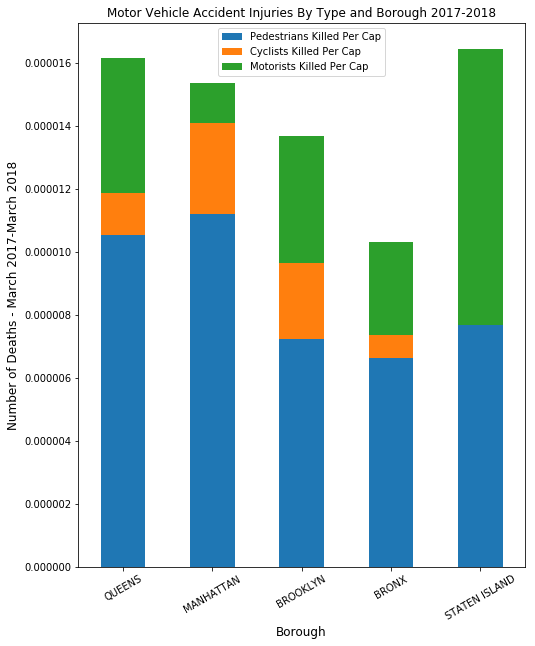

In [25]:
injuriesbyborough['Total Injured Per Cap'] = np.divide(injuriesbyborough['Total Injured'],boroughpop['sum_population'])
deathsbyborough['Total Killed Per Cap'] = np.divide(deathsbyborough['Total Killed'],boroughpop['sum_population'])
injuriesbyborough = injuriesbyborough.sort_values(by='Total Injured Per Cap', ascending=False)
deathsbyborough = deathsbyborough.sort_values(by='Total Killed Per Cap', ascending=False)

ax = injuriesbyborough[['Pedestrians Injured Per Cap','Cyclists Injured Per Cap', 'Motorists Injured Per Cap']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Injuries - March 2017-March 2018", fontsize=12)

ax = deathsbyborough[['Pedestrians Killed Per Cap','Cyclists Killed Per Cap', 'Motorists Killed Per Cap']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Type and Borough 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Borough", fontsize=12)
ax.set_ylabel("Number of Deaths - March 2017-March 2018", fontsize=12)

plt.show()

Checking the largest accidents we see that there are no major outliers contributing to this discrepency.

In [12]:
accidents = accidents.sort_values(by='Total Killed', ascending=False)
accidentstop10 =accidents.head(10)
print(accidentstop10)

          Borough Contributing_Factor_1 Contributing_Factor_2       Date  \
193648  MANHATTAN       Other Vehicular           Unspecified 2017-10-31   
158552     QUEENS          Unsafe Speed           Unspecified 2017-09-18   
384584        NaN           Unspecified           Unspecified 2016-06-19   
230057        NaN           Unspecified           Unspecified 2016-08-31   
86937         NaN          Unsafe Speed           Unspecified 2017-07-16   
97738         NaN           Unspecified                   NaN 2014-10-17   
66576      QUEENS          Unsafe Speed                   NaN 2017-06-17   
394334   BROOKLYN           Unspecified           Unspecified 2016-08-01   
383460        NaN           Unspecified                   NaN 2016-06-13   
20443         NaN           Unspecified           Unspecified 2017-04-17   

        Cyclists Injured  Cyclists Killed  Motorists Injured  \
193648                 1                2                  4   
158552                 0           

 ## 3. Visualizing the Data
 ### 3.2 When Accidents Occur
 Not where, but when accidents occur. Based on time of day as well as month.

### 3.2.1 Time of Day
 
#### Observations and Takeaways
 
##### Injuries
 We see below that injuries for accidents are low in the wee hours of the night. They start rising at around 6 am, with a mini-peak at around 8 am. They fall until 10, at which point they steadily rise again before peaking at around 5pm.
 
 It seems that accidents are low from midnights to 6 am due to few drivers on the road. Accidents spike between 6-8 am as more drivers rush to work, perhaps falling afterwards as roads get too congested for real injuries to take place.
 
 As rushhour ends at 10pm, the rise up to 5pm can be explained by crowded, but not completely congested streets.
 
Interestingly, accidents occur far more at the end of the day than at the beginning. One may posit that this is due to factors such as road-rage after a stressful day at work, fatigure after a long day, or eagerness to arrive home.

In reaction, officials may determine that targeting messaging to drivers may be a good way to alert them to the risks when driving home in the evening. They may also opt to post more traffic cops and general officers throughout the city during these times.

##### Deaths

In direct contrast with injuries, deaths occur the most in the wee hours of the night. This could be due to a number of factors including driver fatigue, drunk driving, and higher car speeds thanks to fewer drivers on the road.

Deaths plummet during the morning rush hour and interestingly rise steadily throughout the day until rush hour is over. This might be because as drivers reach the tail end of their commute home, they are more tired and more eager to get home, and, importantly, no longer in slow-moving traffic.

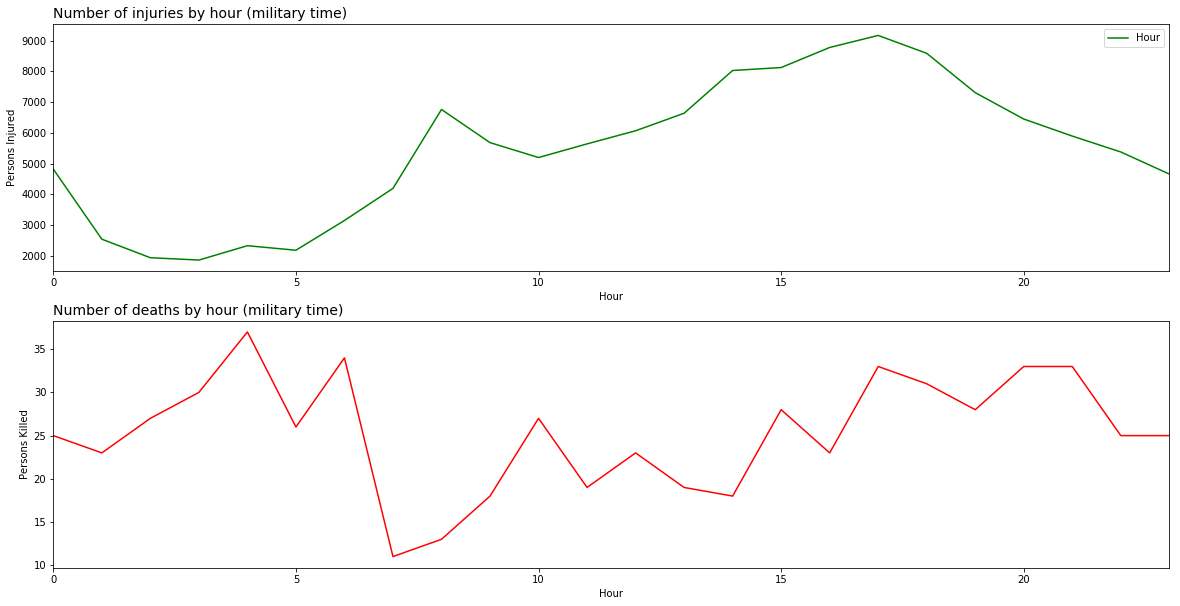

In [13]:
accidentsbyhour = accidents.groupby(['Hour']).sum()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))  
accidentsbyhour['Total Injured'].plot(ax=ax[0], color='green')
ax[0].set_title('Number of injuries by hour (military time)', fontsize=14, loc='left')
ax[0].set_ylabel('Persons Injured')
ax[0].legend(['Hour', 'Persons Injured'])  
accidentsbyhour['Total Killed'].plot(ax=ax[1], color='red')
ax[1].set_title('Number of deaths by hour (military time)', fontsize=14, loc='left')
ax[1].set_ylabel('Persons Killed')
plt.show()

### 3.2.2 Month 
 
#### Observations and Takeaways
Injuries and deaths seems to show a similar seasonal trend. That being said, there is a consistently low level of deaths from January through to May.

Spring is a visibly a period of low injuries and deaths, which continues into most of summer. From August to September accidents are at their highest.

This may be weather related. More people (and tourists) might be out from August to September. It could also have to do with commuter levels - springtime is a period when many choose to take vacations. Finally, fewer deaths may occur during the cold months as weather prevents motorists from driving too quickly.

City officials could be put on "high alert," or government services increased during this fall and winter period. To balance the budget, this could be met with reduced government services during the low spring and summer months.




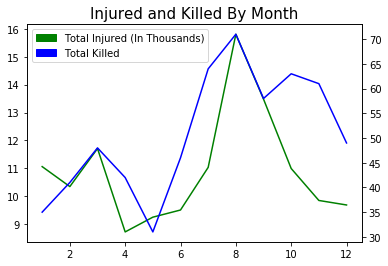

In [14]:
injuriesbymonth = accidents.groupby(['MonthNumber']).sum()
injuriesbymonth['Month'] = ['January','February','March','April','May','June','July','August','September','October','November','December']

fig, ax1 = plt.subplots()

x = injuriesbymonth.index
y1 = injuriesbymonth['Total Injured']/1000
y2 = injuriesbymonth['Total Killed']
ax1.set_title("Injured and Killed By Month",fontsize=15)

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-', label = "Total Injured")
ax2.plot(x, y2, 'b-', label = "Total Killed")

injured = mpatches.Patch(color='Green', label='Total Injured (In Thousands)')
killed = mpatches.Patch(color='Blue', label='Total Killed')
plt.legend(handles=[injured,killed])

plt.show()



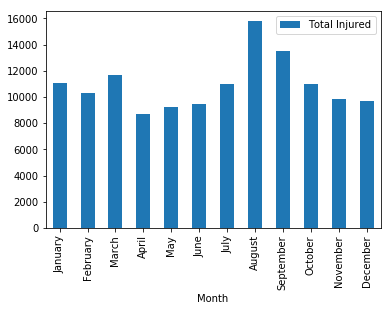

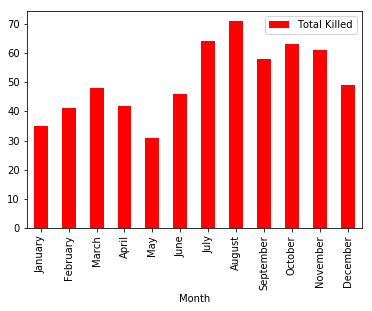

In [31]:
injuriesbymonth.plot(y='Total Injured',kind='bar')


deathsbymonth = accidents.groupby(['MonthNumber']).sum()
deathsbymonth['Month'] = ['January','February','March','April','May','June','July','August','September','October','November','December']
deathsbymonth = deathsbymonth.set_index('Month')
deathsbymonth.plot(y='Total Killed',kind='bar', color='red')
plt.show()

### 3.2.3 Month and Traveler Type

Falls and rises in injuries are driven primarily by changes in motorist injuries. This does not come as a huge surprise, given that they account for the vast majority of injuries. 

However, the delta in deaths between months is caused by motorist, pedestrian, and cyclist deaths alike. Frightenenly, about half of deaths are not to the motorists, but to pedestrians and cyclists. This demonstrates the importance of protecting those on foot and bike with sidewalks, crosswalks, walking/biking lanes, etc; Motorists are protected de-facto by their cars, while those outside are extremely vulnerable.

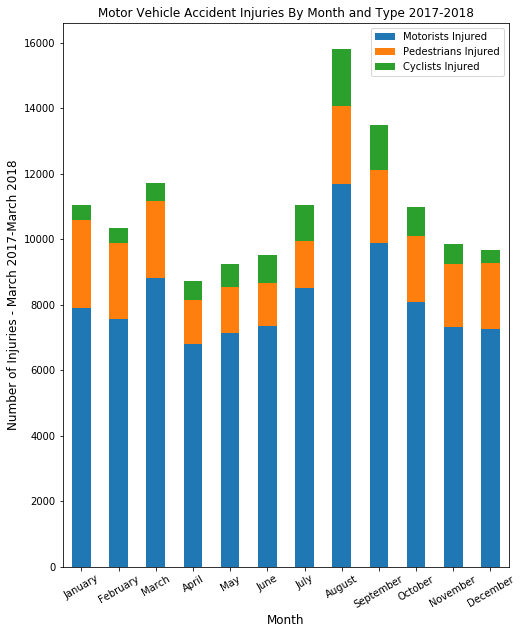

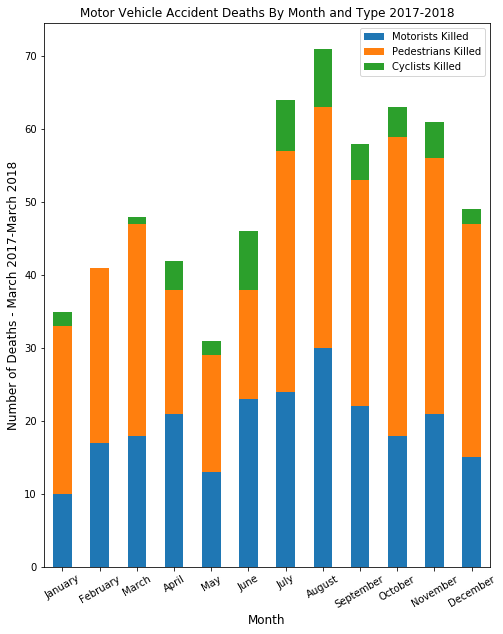

In [32]:
ax = injuriesbymonth[['Motorists Injured','Pedestrians Injured','Cyclists Injured',]].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Injuries By Month and Type 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of Injuries - March 2017-March 2018", fontsize=12)

ax = deathsbymonth[['Motorists Killed','Pedestrians Killed','Cyclists Killed']].plot(kind='bar', stacked = True,title ="Motor Vehicle Accident Deaths By Month and Type 2017-2018", figsize=(8, 10), legend=True, fontsize=10,rot=30)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of Deaths - March 2017-March 2018", fontsize=12)

plt.show()

### 3.2.4 Month and Borough

Data seems to suggest that changes in injury rates by month do not favor particular boroughs. While we observed earlier that boroughs are responsible for differering absolute amounts of accidents, their relative importance does not shift noticeably from month to month. In other words, injuries rise and fall in unison across boroughs throughout the year.

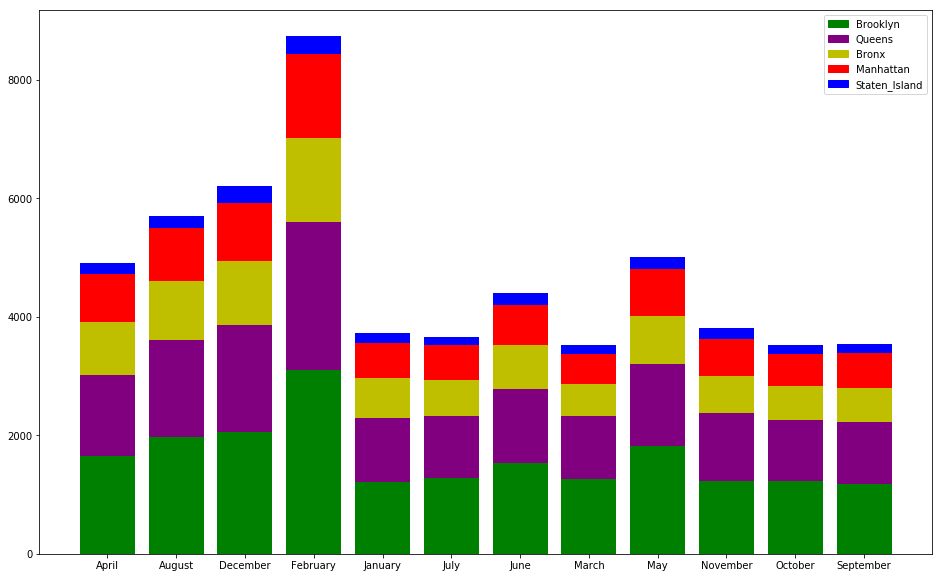

In [33]:
accidentsbymonthborough = accidents.groupby(['Month', 'Borough'], as_index=False).sum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))  
A1 = accidentsbymonthborough.query("Borough=='BROOKLYN'")['Total Injured']
B2 = np.add(A1,accidentsbymonthborough.query("Borough=='QUEENS'")['Total Injured'])
C3= np.add(B2,accidentsbymonthborough.query("Borough=='BRONX'")['Total Injured'])
D4 = np.add(C3,accidentsbymonthborough.query("Borough=='MANHATTAN'")['Total Injured'])
E5 = np.add(D4,accidentsbymonthborough.query("Borough=='STATEN ISLAND'")['Total Injured'])


X = injuriesbymonth.index.tolist()

plt.bar(X, E5, color = 'b')
plt.bar(X, D4, color = 'r')
plt.bar(X, C3, color = 'y')
plt.bar(X, B2, color = 'purple')
plt.bar(X, A1, color = 'g')

Brooklyn = mpatches.Patch(color='g', label='Brooklyn')
Queens = mpatches.Patch(color='Purple', label='Queens')
Bronx = mpatches.Patch(color='y', label='Bronx')
Manhattan = mpatches.Patch(color='r', label='Manhattan')
Staten_Island= mpatches.Patch(color='b', label='Staten_Island')
plt.legend(handles=[Brooklyn,Queens,Bronx,Manhattan,Staten_Island])


plt.show()

 ## 3. Visualizing the Data
 ### 3.3 Why Accidents Occur
Not where or when, but why accidents occur. The causes of accidents based on the primary car/driver at fault.

#### Observations and Takeaways

In the charts below I look at the top eight contributing factors to injuries and fatalities. The percentages relate to the percent that each item accounts for in the group of eight.

The biggest culprit by far for injuries is driver inattention. This is followed by a failure to yield right-of-way and following too closely. 

Perhaps unsurprisingly, the main causes of accident deaths are different. While the leading factor is still driver inattention, 2nd and 3rd major contributing factors are failure to yield right of way and unsafe speeds. 

Surprisingly, alcohol consumption accounts for a relatively low percentage of injuries and deaths.

Officials looking to address injuries and/or fatalities can look to these results for direction in which practices to pursue and which behaviours to change.

In [34]:
#remove unspecified as an option
accidents = accidents[accidents.Contributing_Factor_1 != 'Unspecified']


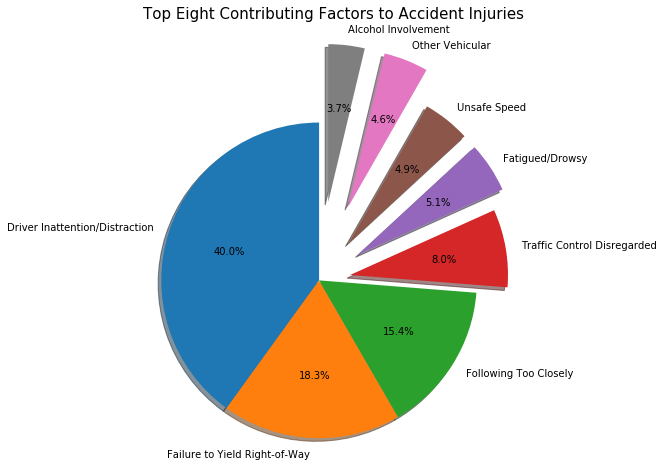

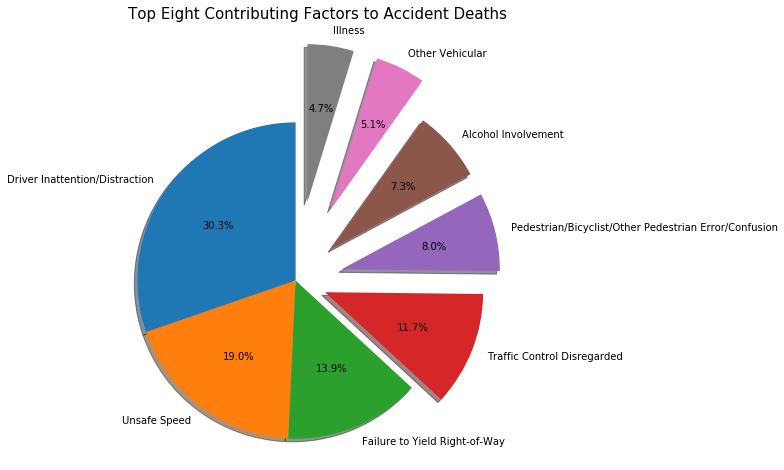

In [35]:
contributingfactor = accidents.groupby(['Contributing_Factor_1']).sum() #group dataset by contributing factor

contributingfactorinjured = contributingfactor.sort_values(by='Total Injured', ascending=False) #get top 8 injuries
contributingfactorinjured =contributingfactorinjured.head(8)

contributingfactorkilled = contributingfactor.sort_values(by='Total Killed', ascending=False) #get top 8 deaths
contributingfactorkilled =contributingfactorkilled.head(8)

#Plot injured pie chart
labels = contributingfactorinjured.index
sizes =contributingfactorinjured["Total Injured"]
explode = (0,0,0,.2,.3,.3,.5,.5)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Top Eight Contributing Factors to Accident Injuries",fontsize=15)

#Plot deaths pie chart
labels = contributingfactorkilled.index
sizes =contributingfactorkilled["Total Killed"]
explode = (0,0,0,.2,.3,.3,.5,.5)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Top Eight Contributing Factors to Accident Deaths",fontsize=15)

plt.show()

 ## 4. Conclusion
 
 If NYC government officials are not already leveraging accident data to target efforts, there are many areas in which this data can guide their efforts. Citizens of and travelers to NYC can also stand to gain from greater knowledge of when and where to be most aware in NYC. Some observations in this dataset may also be applicable across other cities and countries, as it is reasonable to suggest that many trends around time and cause of accident are ubiquitous.
 
 ### Key Observations
 
 Key accident observations for the city of New York include:
 
 #### Where
 1. Staten Island has a significantly higher per capita death rate of motorists than other boroughs.
 2. Manhattan is the most dangerous place for cyclists and pedestrians, but the safest place for motorists.
 3. Brooklyn has the most injuries due to accidents per capita while Staten Island has the least.
 4. However, Staten Island has the most deaths due to accidents per capita while the Bronx has by far the least.
 
 
 
#### When
 1. Accidents occur the most during both morning and evening rush hour.
 2. Even so, the most deaths occur between 4 and 7 am, plummeting in the morning rush hour but rising again during the evening rush hour.
 3. Spring is the period with the fewest amount of injuries and deaths due to accidents.
 4. The late summer and fall periods see the most accidents resulting in injuries and deaths.
 
#### How/Why
 
 1. While the vast majority of injuries are to the motorists themselves, half of accidents deaths are born by pedestrians and cyclists.
 2. The top cause of both injuries and deaths in accidents is Driver Inattention/Distraction
 3. The top three causes of death in accidents are distracted drivers, unsafe speeds, and a failure to yield the right-of-way. These causes account for almost two-thirds of all deaths in accidents. 
 


